In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import rcParams

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vinodbarel","key":"20d0e66677df8bd148f305efd1611985"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle dataset list


usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: argument command: invalid choice: 'dataset' (choose from 'competitions', 'c', 'datasets', 'd', 'kernels', 'k', 'config')


In [6]:
!kaggle datasets download -d shenba/time-series-datasets

  0% 0.00/19.2k [00:00<?, ?B/s]
100% 19.2k/19.2k [00:00<00:00, 12.3MB/s]


In [7]:
!unzip time-series-datasets.zip

Archive:  time-series-datasets.zip
  inflating: Electric_Production.csv  
  inflating: daily-minimum-temperatures-in-me.csv  
  inflating: monthly-beer-production-in-austr.csv  
  inflating: sales-of-shampoo-over-a-three-ye.csv  


## Importing the Time Series 

In [8]:
data = pd.read_csv('/content/sales-of-shampoo-over-a-three-ye.csv')

In [9]:
data.head()

,Month,Sales of shampoo over a three year period
0,1-Jan,266.0
1,1-Feb,145.9
2,1-Mar,183.1
3,1-Apr,119.3
4,1-May,180.3


In [10]:
data['Sales']=data['Sales of shampoo over a three year period'].astype(float)

In [11]:
#data.drop('Sales of shampoo over a three year period')
data = data.drop(['Sales of shampoo over a three year period'], axis=1)


In [12]:
data.tail()

,Month,Sales
31,3-Aug,407.6
32,3-Sep,682.0
33,3-Oct,475.3
34,3-Nov,581.3
35,3-Dec,646.9


In [13]:
data.shape

(36, 2)

In [14]:
date = pd.date_range(start='1/1/2019', end='12/31/2021', freq='M')
date

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', freq='M')

In [15]:
data['Time_Stamp'] = pd.DataFrame(date,columns=['Date'])
data.head()


,Month,Sales,Time_Stamp
0,1-Jan,266.0,2019-01-31
1,1-Feb,145.9,2019-02-28
2,1-Mar,183.1,2019-03-31
3,1-Apr,119.3,2019-04-30
4,1-May,180.3,2019-05-31


In [16]:
data.tail()

,Month,Sales,Time_Stamp
31,3-Aug,407.6,2021-08-31
32,3-Sep,682.0,2021-09-30
33,3-Oct,475.3,2021-10-31
34,3-Nov,581.3,2021-11-30
35,3-Dec,646.9,2021-12-31


In [17]:
data = data.set_index('Time_Stamp')
data.head()

,Month,Sales
Time_Stamp,,
2019-01-31,1-Jan,266.0
2019-02-28,1-Feb,145.9
2019-03-31,1-Mar,183.1
2019-04-30,1-Apr,119.3
2019-05-31,1-May,180.3


In [18]:
df_final = data.drop(['Month'], axis=1)
df_final.head()

,Sales
Time_Stamp,
2019-01-31,266.0
2019-02-28,145.9
2019-03-31,183.1
2019-04-30,119.3
2019-05-31,180.3


#Plotting the time-series


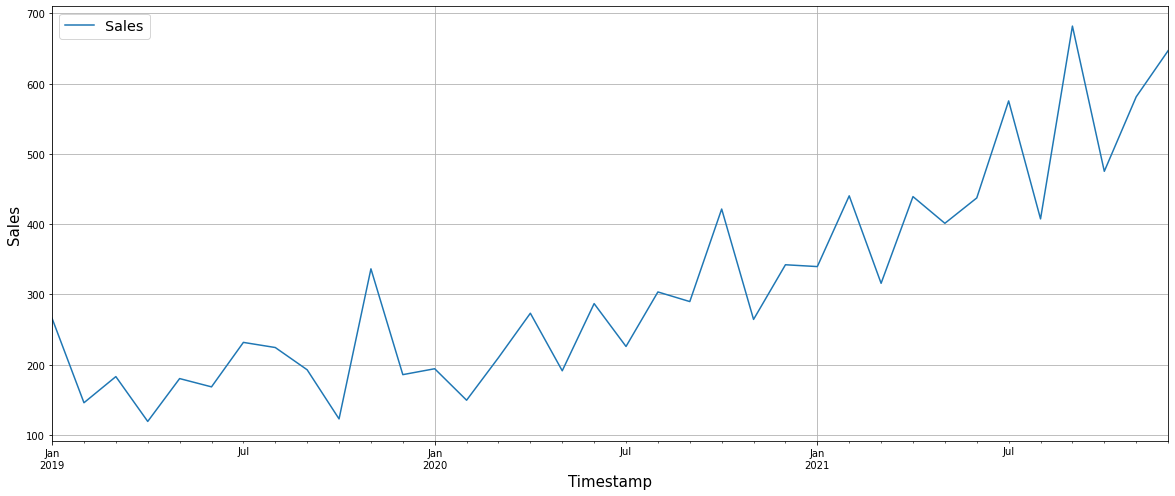

In [19]:
#Plotting the time-series
df_final.plot(figsize=(20,8))
plt.grid();
plt.xlabel('Timestamp',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

There seems to be a trend (increasing) with a seasonality as well.



In [20]:
#Checking for missing values
df_final.isnull().sum()


Sales    0
dtype: int64

**Exploratory Data Analysis**


In [21]:
round(df_final.describe(),3)


,Sales
count,36.000
mean,312.600
std,148.937
min,119.300
25%,192.450
50%,280.150
75%,411.100
max,682.000



*   Sales of shampoo ranges from 119.3 unit to 682 unit, hinting huge variation in sales across months.


*  Mean sales is 312.6




# Yearly Boxplot



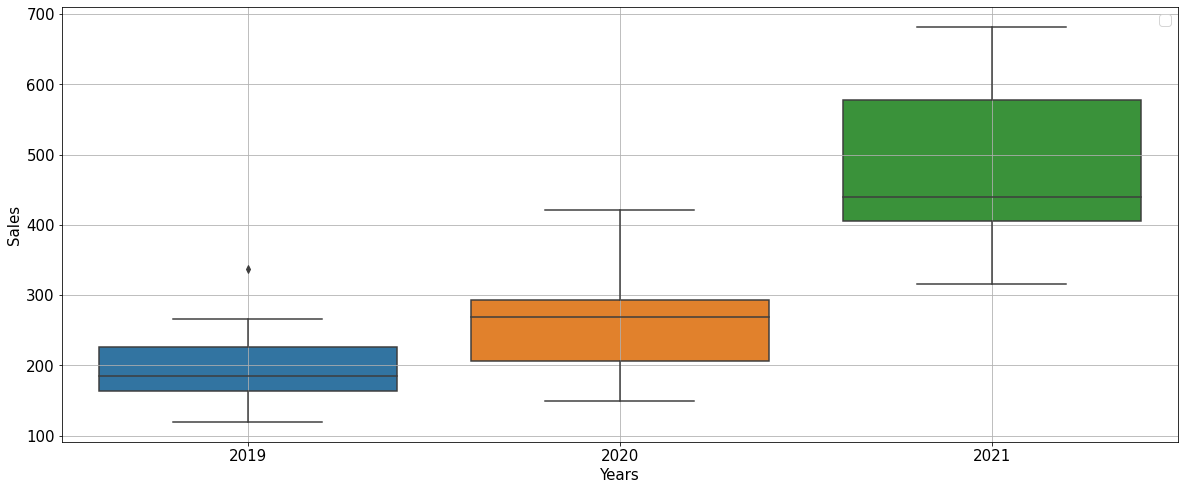

In [22]:
_, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x = df_final.index.year,y = df_final.values[:,0],ax=ax)
plt.grid();
plt.xlabel('Years',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

**Above plot suggests that series has a significant trend. Every year sales is increasing.**



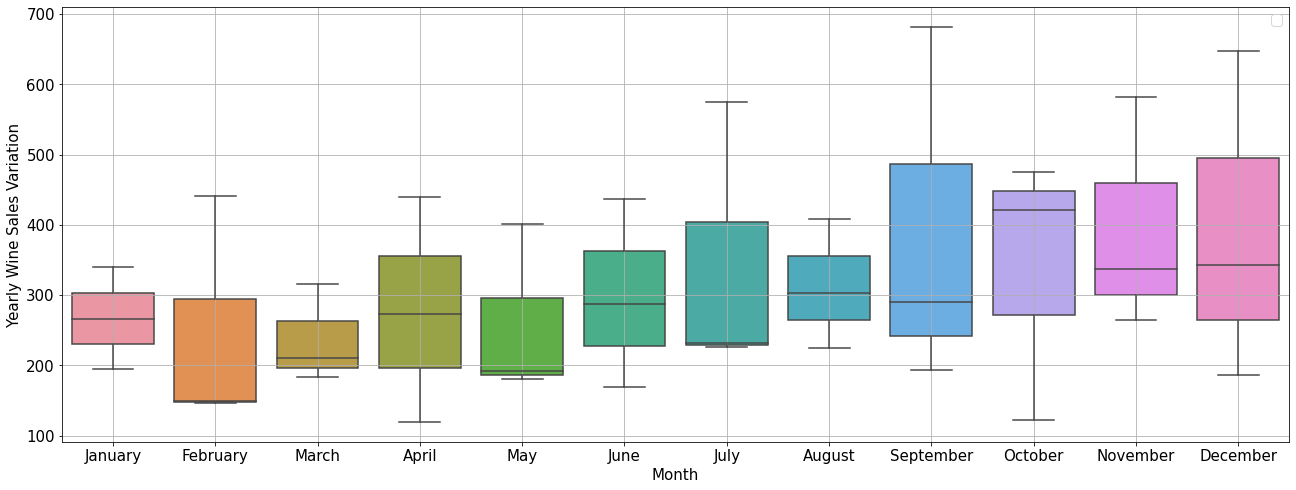

In [23]:
#Monthly Boxplot
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_final.index.month_name(),y = df_final.values[:,0],ax=ax)

plt.grid();
plt.xlabel('Month',fontsize=15)
plt.ylabel('Yearly Wine Sales Variation',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")



*   It appears that we have a seasonal component each year.

*   Also, we see that there are no outliers present.




#Monthly sales across years


In [24]:
monthly_sales_across_years = pd.pivot_table(df_final, values = 'Sales', columns = df_final.index.month_name(), index = df_final.index.year)
monthly_sales_across_years

Time_Stamp,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
2019,119.3,224.5,185.9,145.9,266.0,231.8,168.5,183.1,180.3,336.5,122.9,192.8
2020,273.3,303.6,342.3,149.5,194.3,226.0,287.0,210.1,191.4,264.5,421.6,289.9
2021,439.3,407.6,646.9,440.4,339.7,575.5,437.4,315.9,401.3,581.3,475.3,682.0


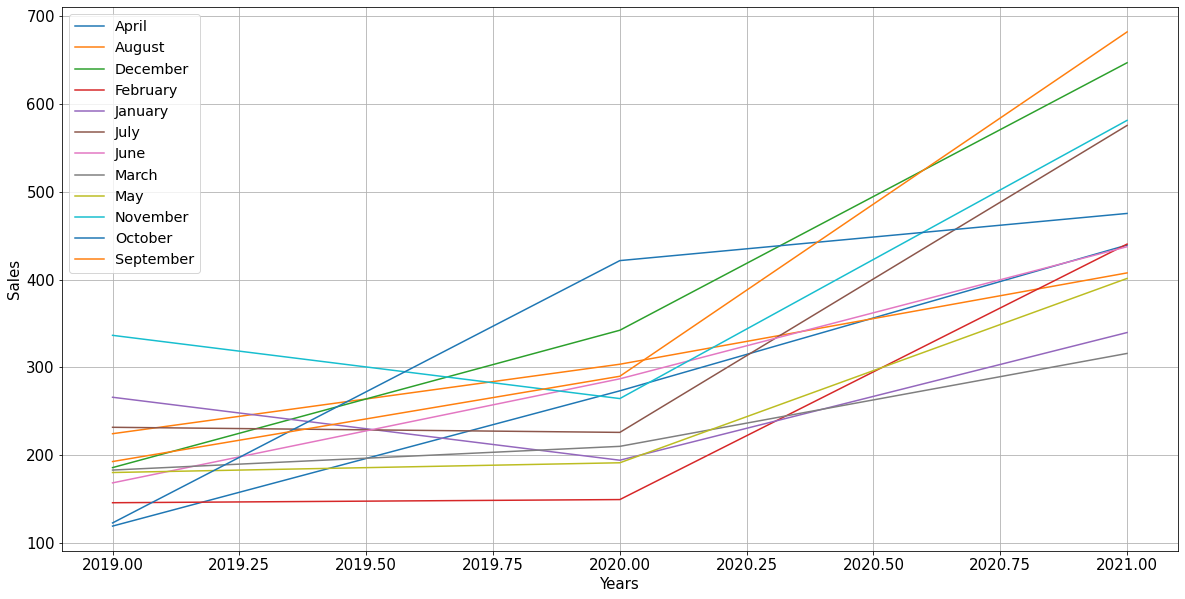

In [25]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');
plt.xlabel('Years',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

Till 2020 there is no significant trend, but from 2020 to 2021 there is a significant trend seen.



#Quarterly sales across years


In [26]:
quarterly_turnover = pd.pivot_table(df_final, values = "Sales", columns = df_final.index.quarter, index = df_final.index.year)
quarterly_turnover

Time_Stamp,1,2,3,4
Time_Stamp,,,,
2019,198.333333,156.033333,216.366667,215.100000
2020,184.633333,250.566667,273.166667,342.800000
2021,365.333333,426.000000,555.033333,567.833333


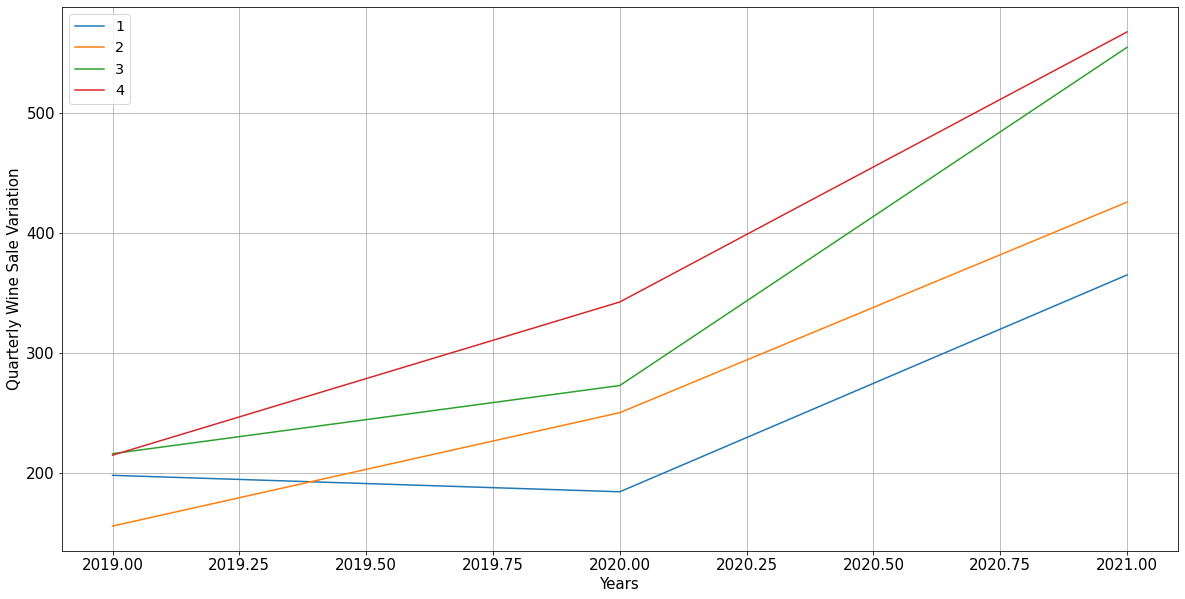

In [27]:
quarterly_turnover.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

plt.xlabel('Years',fontsize=15)
plt.ylabel('Quarterly Wine Sale Variation',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

As seen from the above plot, Q4 has the highest sales. After that Q3. Q1 and Q2 have lowest sales.



## Plotting the time series monthly plot to understand the spread of sales across different years and within different months across years. 

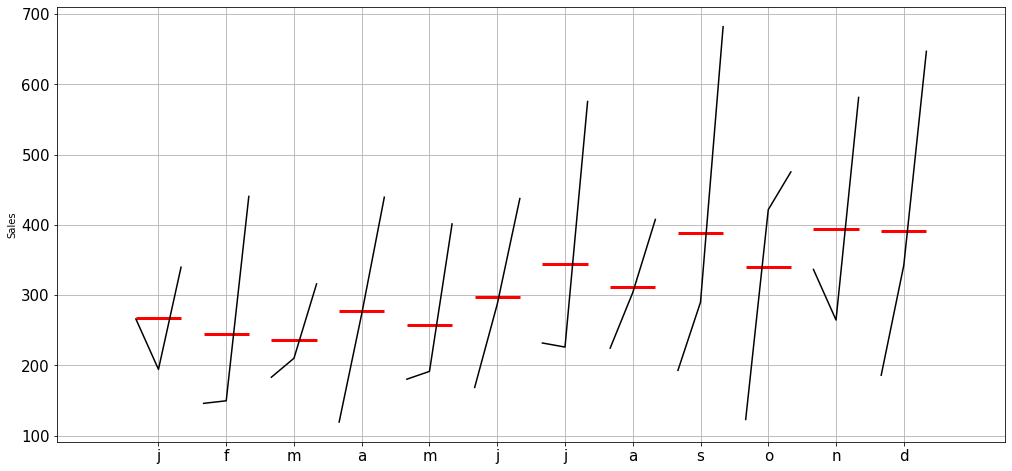

In [28]:
from pylab import rcParams

rcParams['figure.figsize'] =17,8

from statsmodels.graphics.tsaplots import month_plot
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
month_plot(df_final['Sales'],ylabel='Sales')
plt.grid();

For most of the months sales for a month is significantly increasing in the next year.



## Plotting the Empirical Cumulative Distribution.


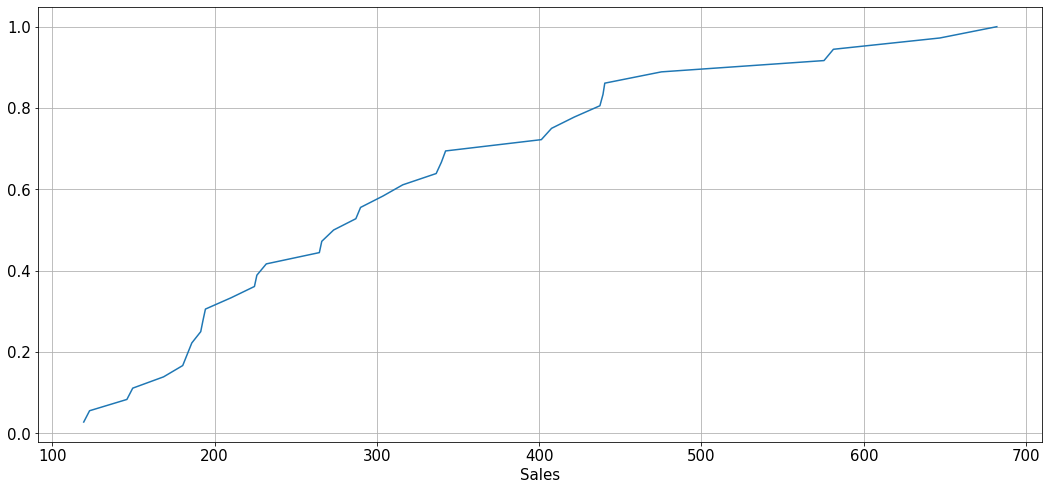

In [29]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df_final['Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.xlabel('Sales', fontsize = 15);



*   Around 60% of all the months had 300 unit or lesser sales.

*   Around 50% of all the months had 450 unit or lesser sales.




##Plot the average sales per month and the month on month percentage change of sales.


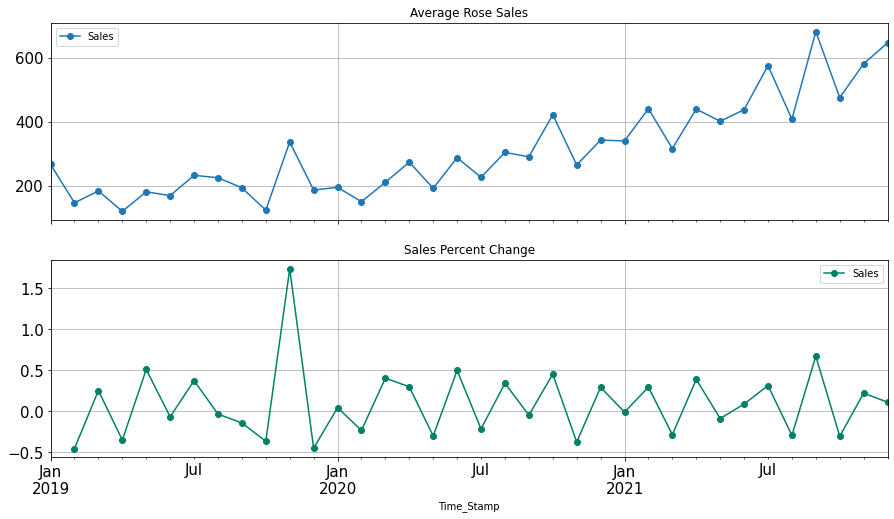

In [30]:
# group by date and get average Customers, and precent change
average    = df_final.groupby(df_final.index)["Sales"].mean()
pct_change = df_final.groupby(df_final.index)["Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Customers over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Customers over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

There is huge percentage change in sales after every month.



##Plot sales for every year


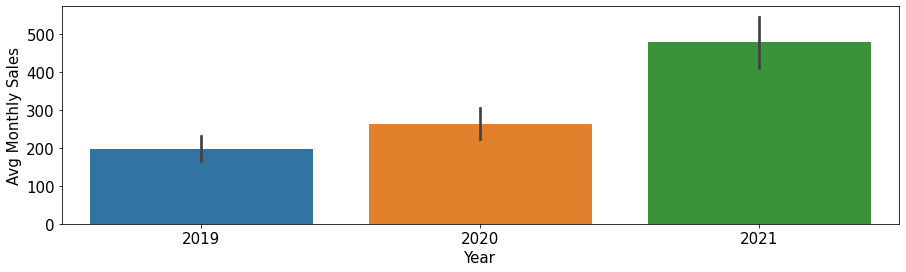

In [31]:
## Plot sales for every year
fig, (axis1) = plt.subplots(1,figsize=(15,4))

sns.barplot(x=df_final.index.year, y=df_final.values[:,0], data=df_final, ax=axis1);
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.xlabel('Year', fontsize = 15);
plt.ylabel('Avg Monthly Sales', fontsize = 15);

It can be seen that, the average monthly sales increases as we move from 2019 to 2021.



#Yearly Total Sales


In [32]:
monthly_sales_across_years = pd.pivot_table(df_final, values = 'Sales', columns = df_final.index.month_name(), index = df_final.index.year)
yearly_total_sales = monthly_sales_across_years.sum(axis = 1, skipna = True) 
yearly_total_sales

Time_Stamp
2019    2357.5
2020    3153.5
2021    5742.6
dtype: float64

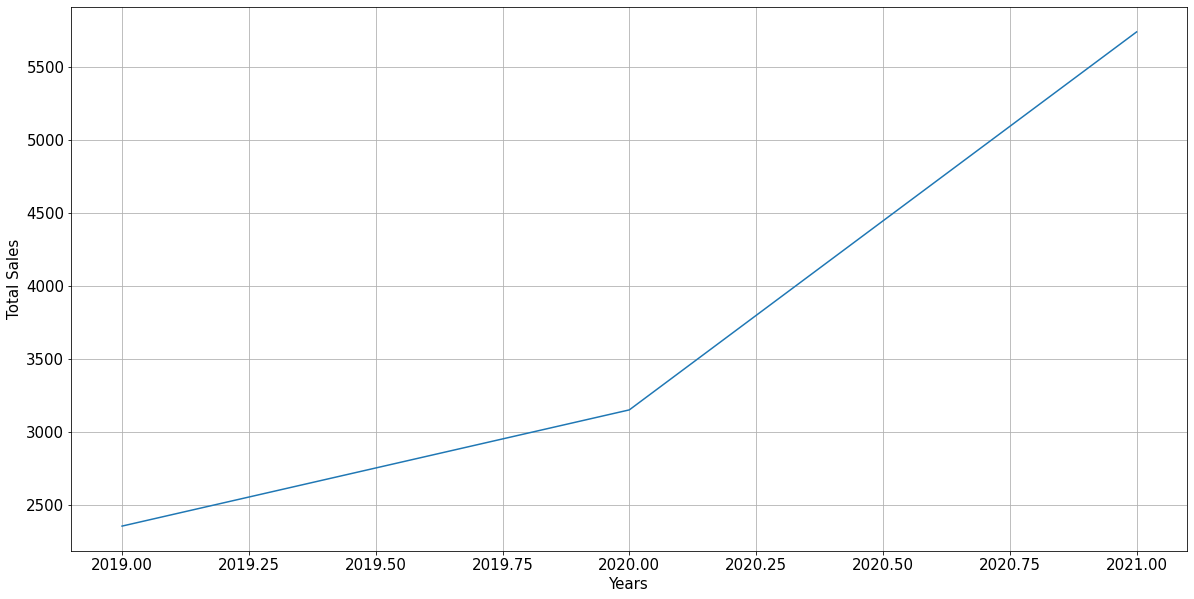

In [33]:
yearly_total_sales.plot(figsize=(20,10))
plt.grid()

plt.xlabel('Years',fontsize=15)
plt.ylabel('Total Sales',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

As it can be seen that total sales every year sales is increasing.



##3. Decomposing the Time Series and plotting the different components.


Assuming additive decomposition


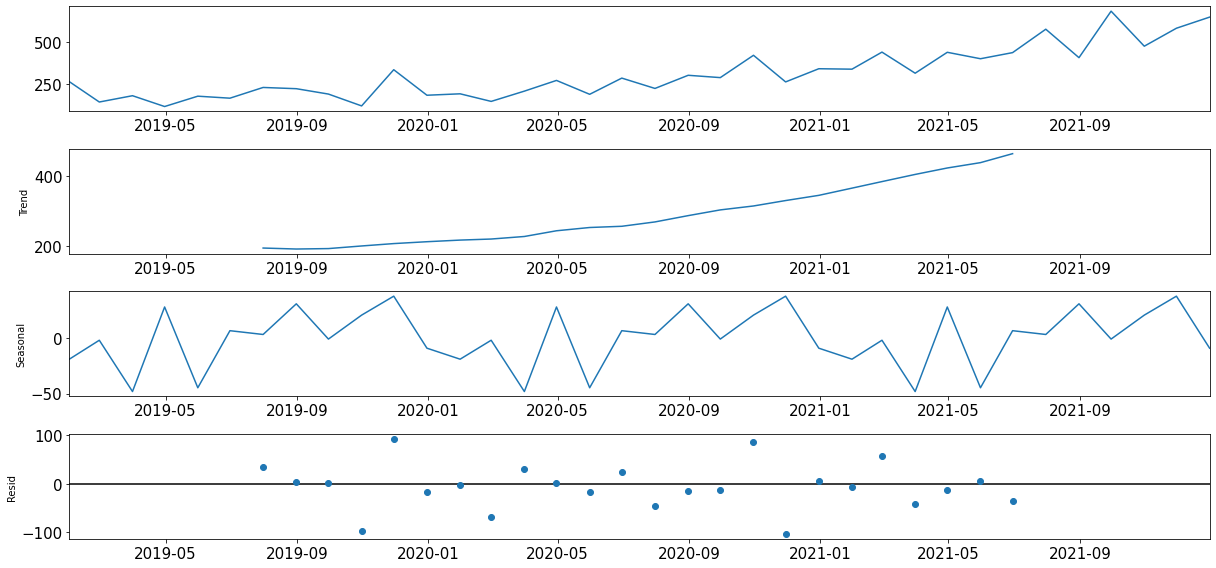

In [34]:
from    statsmodels.tsa.seasonal import   seasonal_decompose
decomposition = seasonal_decompose(df_final,model='additive')
decomposition.plot();
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16

**Assuming multiplicative decomposition**


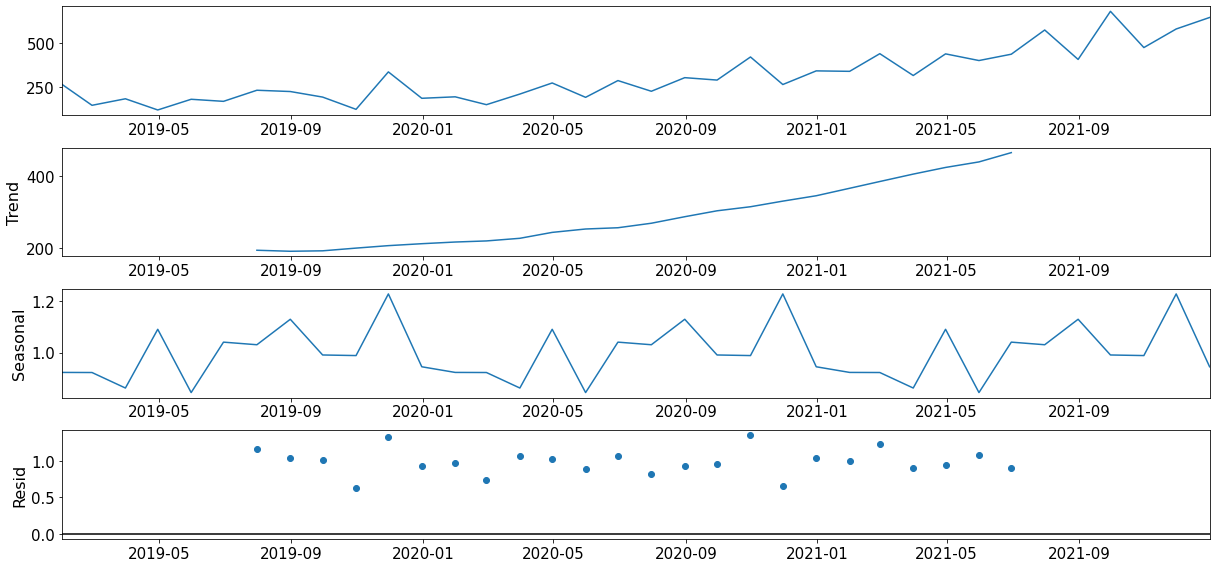

In [35]:
decomposition = seasonal_decompose(df_final,model='multiplicative')
decomposition.plot();
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16

In multiplicative model, We observe that the trend and seasonality are clearly separated and scale of noise is small. In the additive model, there are outliers present in the residual. So series is multiplicative.

In [36]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
2019-01-31           NaN
2019-02-28           NaN
2019-03-31           NaN
2019-04-30           NaN
2019-05-31           NaN
2019-06-30           NaN
2019-07-31    193.470833
2019-08-31    190.633333
2019-09-30    191.908333
2019-10-31    199.450000
2019-11-30    206.329167
2019-12-31    211.729167
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
2019-01-31    0.922913
2019-02-28    0.922549
2019-03-31    0.861982
2019-04-30    1.091374
2019-05-31    0.844236
2019-06-30    1.041187
2019-07-31    1.031036
2019-08-31    1.130490
2019-09-30    0.991044
2019-10-31    0.988744
2019-11-30    1.229457
2019-12-31    0.944987
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
2019-01-31         NaN
2019-02-28         NaN
2019-03-31         NaN
2019-04-30         NaN
2019-05-31         NaN
2019-06-30         NaN
2019-07-31    1.162048
2019-08-31    1.041720
2019-09-30    1.013725
2019-10-31    0.623209
2019-11-30    1.326511
2019-12-31    0.929123
Name: resid, dtype:

#4. Splitting the data into training and test. 70:30


In [37]:
train    =   df_final[0:int(len(data)*0.7)] 
test     =   df_final[int(len(data)*0.7):]

In [38]:
train.shape


(25, 1)

In [39]:
train.tail()


,Sales
Time_Stamp,
2020-09-30,289.9
2020-10-31,421.6
2020-11-30,264.5
2020-12-31,342.3
2021-01-31,339.7


In [40]:
test.shape


(11, 1)

In [41]:
test.head()


,Sales
Time_Stamp,
2021-02-28,440.4
2021-03-31,315.9
2021-04-30,439.3
2021-05-31,401.3
2021-06-30,437.4


## LSTM Model

In [57]:
import tensorflow as tf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler

In [52]:
print("Shape of training set: ", train.shape)
print("Shape of testing set: ", test.shape)

Shape of training set:  (25, 1)
Shape of testing set:  (11, 1)


In [53]:
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [54]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [55]:
n_months = 12
generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(scaled_train, scaled_train, length=n_months, batch_size=1)

In [56]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(n_months, 1)),
    tf.keras.layers.LSTM(100, activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(50, activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(25, activation='tanh'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 12, 50)            30200     
                                                                 
 lstm_2 (LSTM)               (None, 25)                7600      
                                                                 
 dense (Dense)               (None, 1)                 26        
                                                                 
Total params: 78,626
Trainable params: 78,626
Non-trainable params: 0
_________________________________________________________________


In [58]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="loss", verbose=1, patience=2)
history = model.fit(generator, epochs=10, callbacks=[early_stop])

Epoch 1/10
13/13 [==============================] - 6s 16ms/step - loss: 0.1579
Epoch 2/10
13/13 [==============================] - 0s 16ms/step - loss: 0.0566
Epoch 3/10
13/13 [==============================] - 0s 16ms/step - loss: 0.0412
Epoch 4/10
13/13 [==============================] - 0s 17ms/step - loss: 0.0501
Epoch 5/10
13/13 [==============================] - 0s 19ms/step - loss: 0.0425
Epoch 5: early stopping


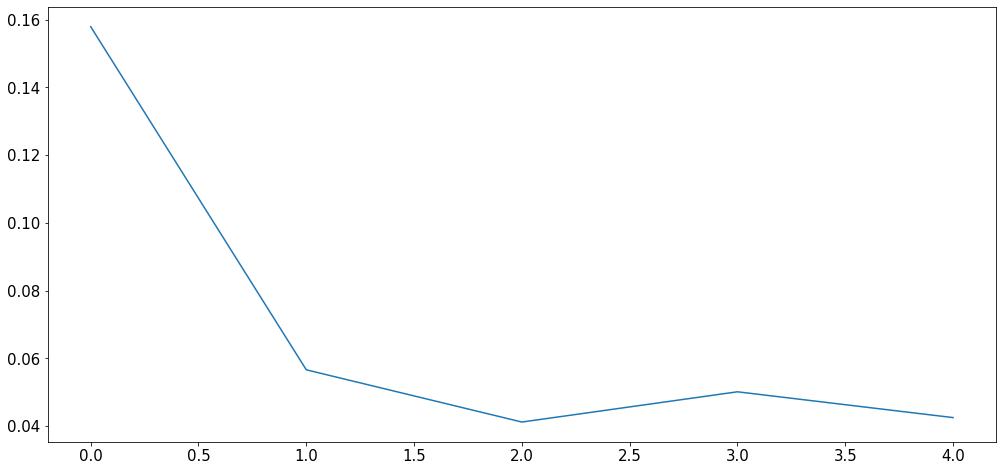

In [59]:
plt.plot(history.history['loss'])
plt.show()

## Evaluating the model 

In [60]:
temp = scaled_train[-n_months:]
temp = temp.reshape((1, n_months, 1))
model.predict(temp)

array([[0.7541783]], dtype=float32)

In [61]:
test_predictions = []
last_batch = scaled_train[-n_months:]
current_batch = last_batch.reshape((1, n_months, 1))
for i in range((test.shape[0])):
    pred = model.predict(current_batch)[0]
    test_predictions.append(pred)
    current_batch = np.append(current_batch[:, 1:, :], [[pred]], axis=1)

In [62]:
test['LSTM_predictions'] = scaler.inverse_transform(test_predictions)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


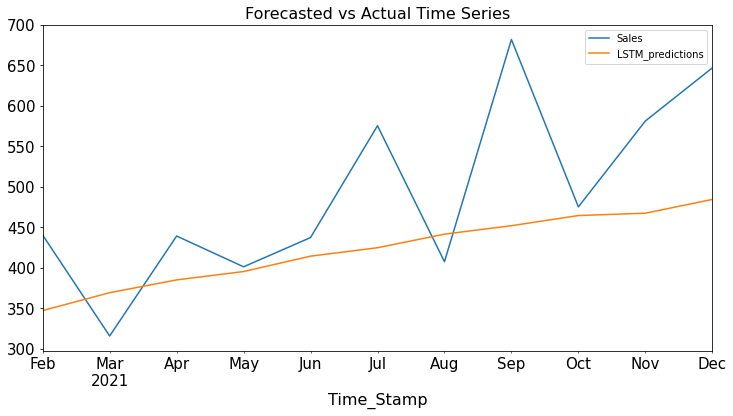

In [63]:
test.plot(figsize=(12,6))
plt.title("Forecasted vs Actual Time Series")
plt.show()